In [ ]:
from google.colab import drive
drive.mount('/drive')

import pandas as pd
df = pd.read_csv('/drive/My Drive/dataset/creditcard.csv', dtype={'Class': object})

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
num_col = df.select_dtypes(exclude = 'object').columns
obj_col = df.select_dtypes(include = 'object').columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0691edd10>,
      dtype=object)

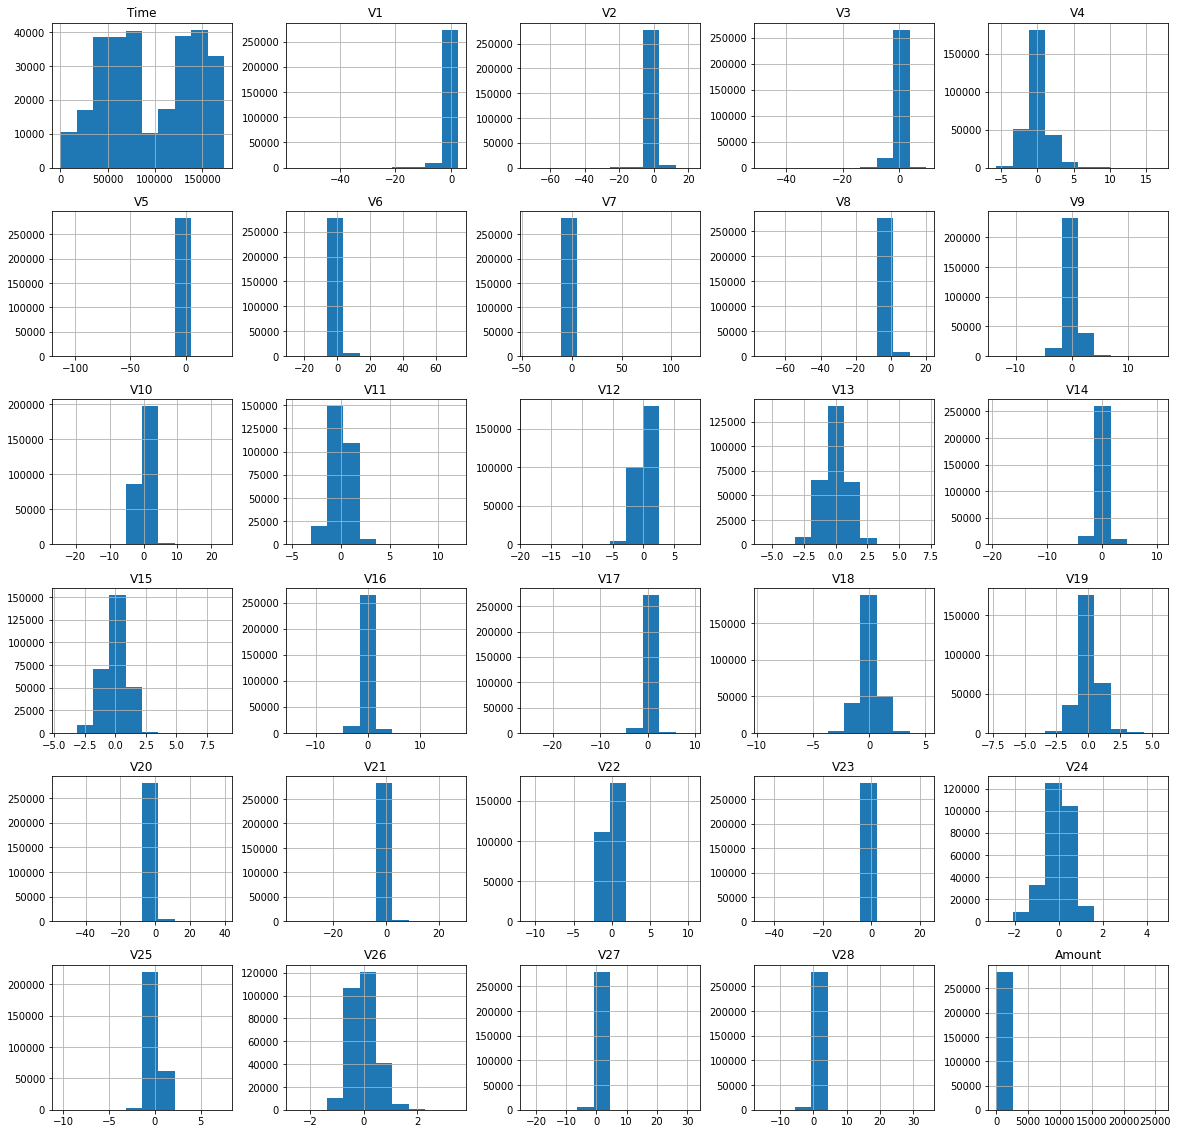

In [ ]:
df[num_col].hist(layout=(6,5), figsize=(20,20))

Fraud Cases: 492
Not Fraud Cases: 284315
Proportion of Fraud Cases: 0.0017%


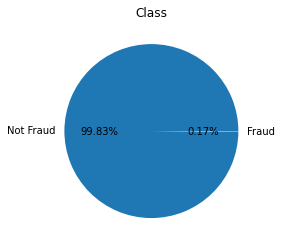

In [ ]:
import matplotlib.pyplot as plt
df2 = df.copy()
new_class_values = {'0': 'Not Fraud', '1': 'Fraud'}
df2['new_class'] = df['Class'].map(new_class_values)

print('Fraud Cases: ' + str(len(df2[df2['new_class']=='Fraud'])))
print('Not Fraud Cases: ' + str(len(df2[df2['new_class']=='Not Fraud'])))
print('Proportion of Fraud Cases: {:.4f}%'.format((len(df2[df2['new_class']=='Fraud'])/df2.shape[0])))

df2['new_class'].value_counts().plot(kind='pie', autopct='%.2f%%', ylabel='', title='Class')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in obj_col:
  df[feat] = le.fit_transform(df[feat].astype(str))

print(df['Class'].dtypes)

int64


In [ ]:
X=df.drop(['Class'],axis=1)
Y=df['Class']

corr_matrix = df.corr(method='pearson')

import numpy as np
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) #Retain upper triangular values of correlation matrix and make Lower triangular values Null

unique_corr_pairs = upper_corr_matrix.unstack().dropna() #Convert to 1-D series

sorted_matrix = unique_corr_pairs.sort_values() #Sort correlation pairs
print(sorted_matrix)

Amount  V2     -0.531409
V3      Time   -0.419618
Amount  V5     -0.386356
Class   V17    -0.326481
        V14    -0.302544
                  ...   
        V11     0.154876
V5      Time    0.173072
Amount  V6      0.215981
        V20     0.339403
        V7      0.397311
Length: 465, dtype: float64


In [ ]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

corr_matrix = df.corr(method='pearson')
corr_target = abs(corr_matrix['Class'])
nonrelevant_feat = corr_target[corr_target<0.5].sort_values(ascending=False)
print(nonrelevant_feat)

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


In [ ]:
#df1 = pd.DataFrame(nonrelevant_feat)
#df1.rename(columns = {'Class': 'Correlation'}, inplace=True)
#df1.index.rename('Class', inplace=True)
#df1 = df1.reset_index()
#drop_col = df1['Class'].value_counts().index

In [ ]:
#X = df.drop(drop_col, axis=1)
X = df.drop(['Class'], axis=1)
Y = df['Class']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = pd.DataFrame(scaler.fit_transform(X))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, train_size=0.7, random_state=42, stratify=Y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
rdmos = RandomOverSampler(random_state = 42) 
X_rdmos_train, y_rdmos_train = rdmos.fit_resample(X_train, y_train)
print('Before Oversampling: ', '0: ', sum(y_train==0), '1: ', sum(y_train==1))
print('After Oversampling: ', '0: ', sum(y_rdmos_train==0), '1: ', sum(y_rdmos_train==1))

Before Oversampling:  0:  199020 1:  344
After Oversampling:  0:  199020 1:  199020


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500, random_state=42)
clf.fit(X_rdmos_train, y_rdmos_train)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Accuracy: 97.96%


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#print(LogisticRegression().get_params().keys())
#solver = ['newton-cg', 'lbfgs', 'sag', 'saga']
solver = ['newton-cg', 'lbfgs']
#penalty = ['l1', 'l2', 'elasticnet', 'none']
penalty = ['l2']
C = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solver, penalty=penalty, C=C)

estimator = LogisticRegression(max_iter=500, random_state=42)

grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5)
grid_results = grid.fit(X_train, y_train)

print('Best Hyperparameters: ', grid_results.best_params_)
print('Best Score: {:.2f}%'.format(grid_results.best_score_*100))

Best Hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 99.92%


In [ ]:
from sklearn.metrics import classification_report
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)
clf_report = classification_report(y_test, y_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.60      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



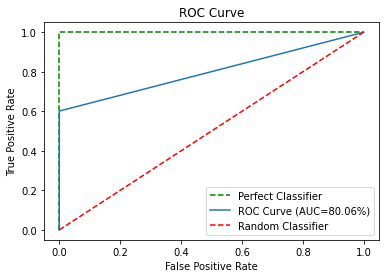

In [ ]:
from sklearn import metrics 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='green', label='Perfect Classifier')
plt.plot(fpr, tpr, label='ROC Curve (AUC={:.2f}%)'.format(auc*100))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()